# The A/B Test procedure from my understanding
#### Usually in internet company, there is a standard procedure for doing A/B test, it is basically as follow:
#### The data scientist who set up the AB Test and tracks the process ——> A software/UI that the DS use to set up the test ——> A service that assign the users into pre-defined groups based on user_id or something similar ——> The user's UI will show different version based on their assigned groups ——> There will be an event log that collects the user's data during the test ——> Data will be transfered to a another service(like visulization dashboard or such kind) for the data scientist to analyze. Below is a more detailed steps:

### <font color='289C4E'>Table of contents</font><a class='anchor' id='top'></a>
- 1.[Define The purpose of the experiment](#1)
- 2.[With the metrics defined, we then establish a hypothesis](#2)
- 3.[Set up statistical hypothesis](#3)
- 4.[Calculate 3 important metrics](#4)
- 5.[Calculate sample size](#5)
- 6.[Decide experiment duration](#6)
- 7.[Do the test](#7)
- 8.[Result Verification (Conducting Statistical Inference)](#8)
- 9.[Evaluate the Result & Launch Decision](#9)
---

### <a class="anchor" id="1"></a>1. Define The purpose of the experiment:
 Generally, in A/B testing, the goal is to determine which product performs better (e.g., different website designs, different algorithm performance). So, we first need to define this purpose. Once we have a clear purpose, we need to identify the relevant metrics — which indicators can be used as the standard to measure the quality of the product (such as click-through rate, conversion rate, average purchase amount..). For instance, if we use Version B, the click-through rate increased by a certain percentage, or if we implemented that algorithm, user engagement and retention improved, etc.


---

### <a class="anchor" id="2"></a>2. With the metrics defined, we then establish a hypothesis:
 For example, you hypothesize that the new algorithm can improve customer's average engagement time because it customizes recommendations based on user preferences, which should attract users to spend more time on the platform. Once we have this business hypothesis, we can proceed to set up the hypothesis test.


---

### <a class="anchor" id="3"></a>3. Set up statistical hypothesis:
 Here you would define the null and alternative hypotheses, for instance:
Null hypothesis = There is no significant difference between Algorithm A (the old algorithm) and Algorithm B (the new algorithm) in terms of their impact on customer's average engagement time, as the daily active time of users has not significantly increased.

Alternative hypothesis = There is a significant difference between Algorithm A and Algorithm B in terms of their impact on customer's average engagement time, as the daily active time of users has significantly increased.


---

### <a class="anchor" id="4"></a>4. Calculate 3 important metrics:
 And then to determine the number of sample you need, we also need to calculate 3 other metrics: statistical power, significance level, and MDE for your test.
 (a)<b>Statistical Power</b>: This refers to the probability of detecting an effect if Algorithm B truly has a significant impact on customer retention. Typically, we set this at 80%, meaning we have 80% confidence that our statistical method can detect the effect of Algorithm B. In special cases, if the first test fails but we believe Algorithm B does have an effect, we can increase the power to 90% for a second test to achieve more accurate results. Alternatively, if the sample size is small and data is limited, we might lower the power to 70% to be more tolerant.The red area under the right curve is the statstical power,we wanna make the yellow area(type 2 error) to be 20% or even smaller.


 (b)<b>Minimum Detectable Effect (MDE)</b>: This represents the smallest improvement in the target metric that we are willing to detect. MDE can be viewed as the minimum acceptable improvement in a metric. It can also be referred to as sensitivity, because if the MDE is too small, more data will be needed to detect the change, requiring more time and effort to collect. In many cases, the time and resource costs may be significant, and after completing the experiment, you might find that the small improvement in the metric wasn't worth the effort. On the other hand, if the MDE is set too high, the experiment might miss some smaller but still meaningful improvements, making the results less reliable. The scale of the company also plays a role. For instance, large companies with tens or hundreds of millions of users can afford to set metrics like conversion rate with an MDE of 1%. But for smaller companies with fewer users, it's reasonable to increase the MDE to 10%, or even 30% in the early growth stage, as conversion rates may improve rapidly.
 
 (c)<b>Significance level</b>: The significance level (Alpha) is typically set to 0.05, which is the industry standard in most statistical analyses.
 
---



### <a class="anchor" id="5"></a>5. Calculate sample size:
 This can be done using a formula. Generally, A/B tests are two-sample tests (comparing differences between two groups of data).
For rate-based metrics (e.g., retention rate, engagement rate), we use the two-sample test formula. You just need to plug in the values.
$$N = \left( \frac{Z_{\alpha/2} \cdot \sqrt{2p(1 - p)} + Z_{\beta} \cdot \sqrt{p_1(1 - p_1) + p_2(1 - p_2)}}{p_2 - p_1} \right)^2$$
Where:
- \($Z_{\alpha/2}$\) : Z-score corresponding to the chosen significance level (e.g., 1.96 for a 5% significance level)
- \($Z_{\beta}$\): Z-score corresponding to the chosen power (e.g., 0.84 for 80% power)
- \($p = \frac{p_1 + p_2}{2}$\): The average of the two conversion rates.


 If you’re testing for certain values (e.g., the average monthly spend for Group A vs. Group B), you’ll need to calculate the variance as well. These are fixed steps, and now there are software tools that can do this calculation for you. You mainly need to input values like statistical power, MDE, significance level, and the retention rates for Group A and Group B.
$$
N = \left( \frac{Z_{\alpha/2} \cdot \sqrt{2 \cdot \sigma^2} + Z_{\beta} \cdot \sqrt{\sigma_1^2 + \sigma_2^2}}{\mu_2 - \mu_1} \right)^2
$$
Where:
- \($\mu_1$\) and \($\mu_2$\) are the means of Group A and Group B.
- \($\sigma^2$\) is the pooled variance (if you assume the two groups have similar variance) or \($\sigma_1^2$\) and \($ \sigma_2^2$\) are the variances for each group.
- \($Z_{\alpha/2}$\): Z-score corresponding to the significance level.
- \($Z_{\beta}$\): Z-score corresponding to the power.
- \($\mu_2 - \mu_1$\) is the minimum detectable effect (the difference between the two means that you want to detect).

---


### <a class="anchor" id="6"></a>6. Decide experiment duration:
 After determining the sample size, the next step is to calculate how long it will take to gather the required samples. A general rule of thumb is that, this process should last at least 1–2 weeks to ensure more reliable results. Too short a timeframe can be problematic because companies in industries like e-commerce are easily affected by weekend fluctuations. If you gather data within just a few days, you might not capture these variations. However, if the period is too long, you also need to consider time costs. To determine the length, look at your company’s daily customer volume, and allocate a portion for the A/B test. For example, if you want the process to last 14 days, divide the total sample requirement by 14 to estimate how many customers need to be part of the A/B test each day.


---

### <a class="anchor" id="7"></a>7. Do the test:
 Once everything is defined, you can start the experiment.The general process involves a data scientist using A/B testing software (such as Optimizely) to set up all the parameters we discussed, calculate the sample size, and split the traffic. Customers will be randomly divided into the control group and the test group, with care taken to ensure randomization and control for other variables. This is to make sure the two groups are similar, except for the target variable, to avoid confounding effects (i.e., ensuring the observed differences in the metrics are truly due to the new design, and not other interfering factors). The control and experiment groups will be exposed to different UIs, and data from each group will be collected into a database for subsequent analysis (visualization, etc.)..


---


### <a class="anchor" id="8"></a>8. Result Verification (Conducting Statistical Inference):
 Suppose after 14 days of testing, we obtain the results. If Group A's average click-through rate is 10% higher than Group B's, we need to test whether this 10% increase is random or statistically significant. This includes several common testing methods.

(a) Chi-square test of independence: Used to test whether there is a statistically significant difference between two results. For example, if we randomly sample 200 people for the A/B test, and the average daily click-through rate for Group A is 10%, while Group B’s is 15%, we want to know if this 5% difference happened randomly or if it is statistically likely to occur. The null hypothesis (H0) is that the two click-through rates are the same, while the alternative hypothesis (H1) is that the two click-through rates are significantly different.

(b) Z-test: Similarly, this test determines whether there is a statistically significant difference between two results. If we are only determining whether one result is greater than the other, we can use a one-tailed Z-test. However, A/B tests are generally two-tailed. In this case, H0 would state that the click-through rates for Group A and Group B are the same, while H1 would state that the click-through rates for Group A and Group B are significantly different. 

(c) T-test: T-tests are not commonly used for A/B testing in companies because the sample size is usually larger than 30. When the sample size exceeds 30, the T-distribution approximates the normal distribution, so a Z-test can be used instead. The T-test is primarily used when the sample size is small, as the variance tends to fluctuate more randomly, causing the distribution to be more spread out. As a result, the T-distribution has heavier tails compared to the normal distribution, allowing for more uncertainty in the data. The T-test is only used for testing the mean values and does not apply to proportional data, mainly because with small sample sizes, proportions tend to be less reliable. For larger sample sizes, Z-tests are preferred because the proportions of the sample approach those of the population.


---


### <a class="anchor" id="9"></a>9. Evaluate the Result & Launch Decision:
 Based on your test results and specific parameters, you can make one of four decisions:
 
`1`- Launch the new variant

`2`- Gradually roll out the new variant (by slowly increasing the number of users, similar to a soft launch)

`3`- Adjust the experimental setup and retest

`4`- Abandon the new variant altogether


---

Now let's do an A/B test practice, I found this dataset on [kaggle](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing)

### Define the purpose
#### Cookie cats is a simple and addictive puzzle gameplay! Connect cookies of the same color to make a delicious chain! As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

#### The A/B test has run for a week and now we are going to analyze the results of this A/B test.
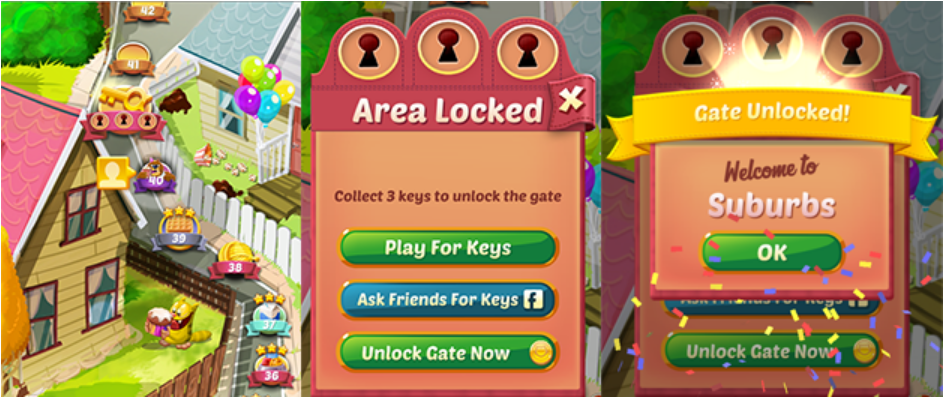

#### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import anderson
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

#### First get the basic sense about the dataset

In [2]:
df = pd.read_csv('cookie_cats.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


#### Usually in reality, the data we get needs to be pre-processed. But this dataset is pretty clean, no null values, yeah!

In [5]:
df.head(10)

userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
5     540  gate_40             187         True         True
6    1066  gate_30               0        False        False
7    1444  gate_40               2        False        False
8    1574  gate_40             108         True         True
9    1587  gate_40             153         True        False

#### Data Dictionary

**`userid`** - a unique number that identifies each player.

**`version`** - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).

**`sum_gamerounds`** - the number of game rounds played by the player during the first week after installation

**`retention_1`** - did the player come back and play 1 day after installing?

**`retention_7`** - did the player come back and play 7 days after installing?

In [6]:
df.describe()

userid  sum_gamerounds
count  9.018900e+04    90189.000000
mean   4.998412e+06       51.872457
std    2.883286e+06      195.050858
min    1.160000e+02        0.000000
25%    2.512230e+06        5.000000
50%    4.995815e+06       16.000000
75%    7.496452e+06       51.000000
max    9.999861e+06    49854.000000

In [7]:
df['sum_gamerounds'].value_counts()

1       5538
2       4606
0       3994
3       3958
4       3629
        ... 
858        1
1102       1
618        1
1027       1
708        1
Name: sum_gamerounds, Length: 942, dtype: int64

#### Now let's check the distribution for the whole group or between control group and treatment group, to get some useful info
1. Unequal sample distribution   
2. Group A has extreme outlier
3. 3994 people never play the game after they download it, might worth to investigate why and further boost user engagement
4. A quarter of people played only 5 times or less, there still could be improvement!

In [8]:
A = df[df['version'] == 'gate_30']
B = df[df['version'] == 'gate_40']

In [9]:
A.describe()

userid  sum_gamerounds
count  4.470000e+04    44700.000000
mean   4.987564e+06       52.456264
std    2.881026e+06      256.716423
min    1.160000e+02        0.000000
25%    2.505469e+06        5.000000
50%    4.983631e+06       17.000000
75%    7.481497e+06       50.000000
max    9.999710e+06    49854.000000

In [10]:
B.describe()

userid  sum_gamerounds
count  4.548900e+04    45489.000000
mean   5.009073e+06       51.298776
std    2.885496e+06      103.294416
min    3.770000e+02        0.000000
25%    2.517171e+06        5.000000
50%    5.007329e+06       16.000000
75%    7.510762e+06       52.000000
max    9.999861e+06     2640.000000

<Axes: ylabel='sum_gamerounds'>

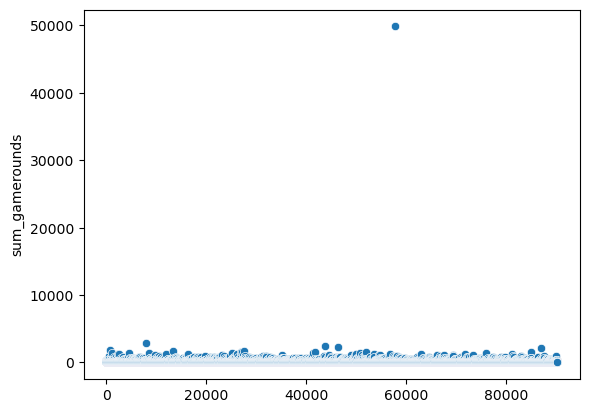

In [12]:
sns.scatterplot(A['sum_gamerounds'])

<Axes: ylabel='sum_gamerounds'>

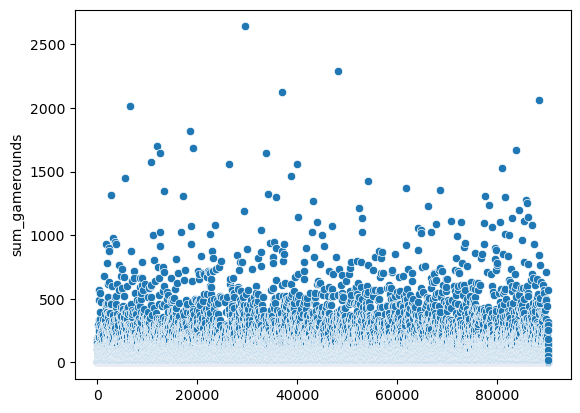

In [75]:
sns.scatterplot(B['sum_gamerounds'])

#### We see that the `sum_gamerounds` column for group A and group B are similar with mean A = 52.456 and mean B = 51.299, but the standard deviation of group A is much larger meaning the difference in `sum_gamerounds` in group A is more spread out(or dispersed), this is also indicated by the max value in group A, which is 49854, meaning a person played 49854 rounds of game during the first week after installation. That's 7122 rounds of game/day, or 297 rounds of game/hour, looks impossible to me! I am going to remove that extreme outlier in case it leads to bias to our following experiment.

In [13]:
A_new = A[A['sum_gamerounds'] != A['sum_gamerounds'].max()]

In [14]:
A_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44699 entries, 0 to 90186
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          44699 non-null  int64 
 1   version         44699 non-null  object
 2   sum_gamerounds  44699 non-null  int64 
 3   retention_1     44699 non-null  bool  
 4   retention_7     44699 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1.4+ MB


#### By removing the extreme outlier, the distribution of sum_gamerounds in group A changes a lot

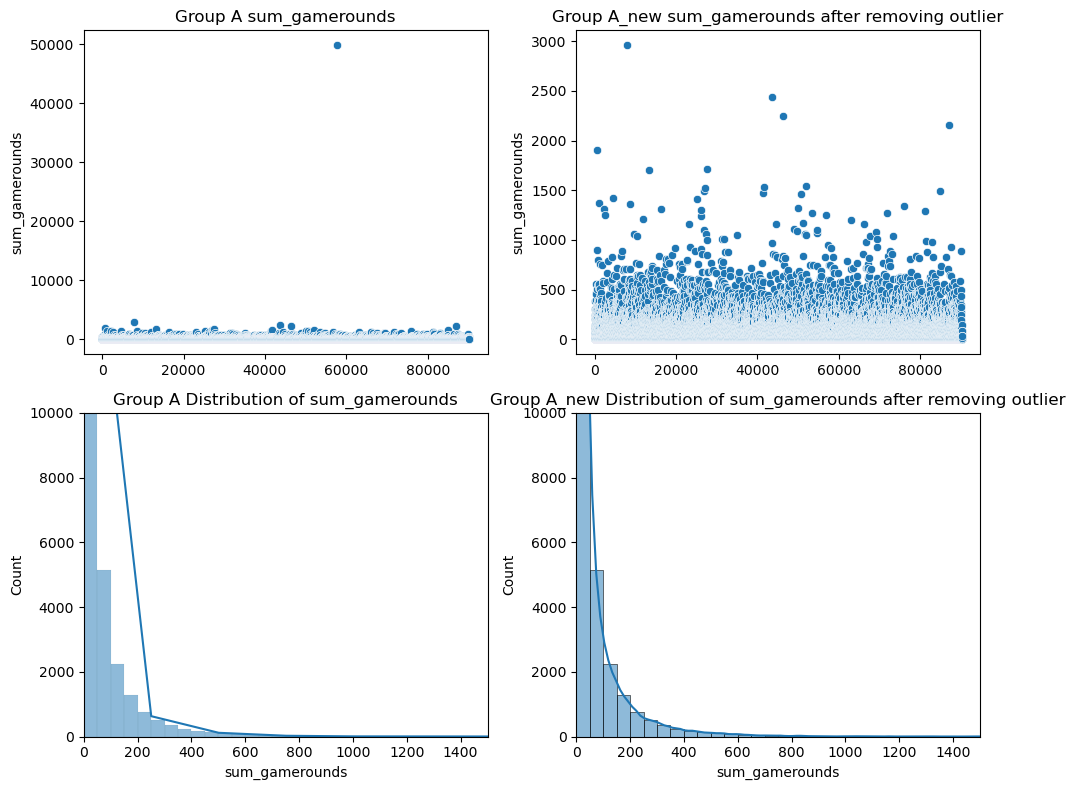

In [15]:
# Create a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot in the first subplot 
sns.scatterplot(A['sum_gamerounds'], ax=axes[0, 0])
axes[0, 0].set_title('Group A sum_gamerounds')

# second subplot 
sns.scatterplot(A_new['sum_gamerounds'], ax=axes[0, 1])
axes[0, 1].set_title('Group A_new sum_gamerounds after removing outlier')

# Third
sns.histplot(A['sum_gamerounds'], bins=np.arange(0, 1000, 50), kde=True, ax=axes[1, 0]) 
axes[1, 0].set_title('Group A Distribution of sum_gamerounds')  
axes[1, 0].set_ylim(0, 10000)  
axes[1, 0].set_xlim(0, 1500)   

# Fourth
sns.histplot(A_new['sum_gamerounds'], bins=np.arange(0, 1000, 50), kde=True, ax=axes[1, 1]) 
axes[1, 1].set_title('Group A_new Distribution of sum_gamerounds after removing outlier')  
axes[1, 1].set_ylim(0, 10000)  
axes[1, 1].set_xlim(0, 1500)   

# Adjust the layout
plt.tight_layout()
plt.show()

#### Now group A looks normal, but before we start to do A/B test, I also realized that the sample distribution between control and treatment group are not exactly 50/50(Sample Ratio Mismatch). I am going to check whether this differene in the number of sample is statistically significant.

In [16]:
df_new = pd.concat([A_new,B])

In [17]:
df_new['version'].value_counts()

gate_40    45489
gate_30    44699
Name: version, dtype: int64

In [18]:
df_new['version'].value_counts(normalize = True)

gate_40    0.50438
gate_30    0.49562
Name: version, dtype: float64

#### Change the column value to either 'A' or 'B' for better understanding

In [20]:
df_new['version'] = np.where(df_new['version'] == 'gate_30','A','B')

In [21]:
df_new.head()

userid version  sum_gamerounds  retention_1  retention_7
0      116       A               3        False        False
1      337       A              38         True        False
6     1066       A               0        False        False
11    2101       A               0        False        False
13    2179       A              39         True        False

#### Define the target metrics, here we are basically going to use the 
`Average sum_gamerounds` - the average number of game rounds played by the player in each group during the first week after installation

`Average retention_1 rate` - The come back and play rate 1 day after installing for each group

`Average retention_7 rate` - The come back and play rate 7 days after installing for each group

In [22]:
Average_sum_gamerounds_A = df_new[df_new['version'] =='A']['sum_gamerounds'].mean()
Average_sum_gamerounds_A

51.342110561757536

In [23]:
Average_sum_gamerounds_B = df_new[df_new['version'] =='B']['sum_gamerounds'].mean()
Average_sum_gamerounds_B

51.29877552814966

<div class="alert alert-block alert-success">  
<b>The average `sum_gamerounds` in both groups look pretty similar. </b>   
</div>

#### Calculate `Average retention_1 rate` for both group A and group B

In [24]:
df_newA = df_new[df_new['version']=='A']
df_newA_avg_1_day = df_newA['retention_1'].sum() / df_newA['retention_1'].count()
df_newA_avg_1_day

0.4481979462627799

In [25]:
df_newB = df_new[df_new['version']=='B']
df_newB_avg_1_day = df_newB['retention_1'].sum() / df_newB['retention_1'].count()
df_newB_avg_1_day

0.44228274967574577

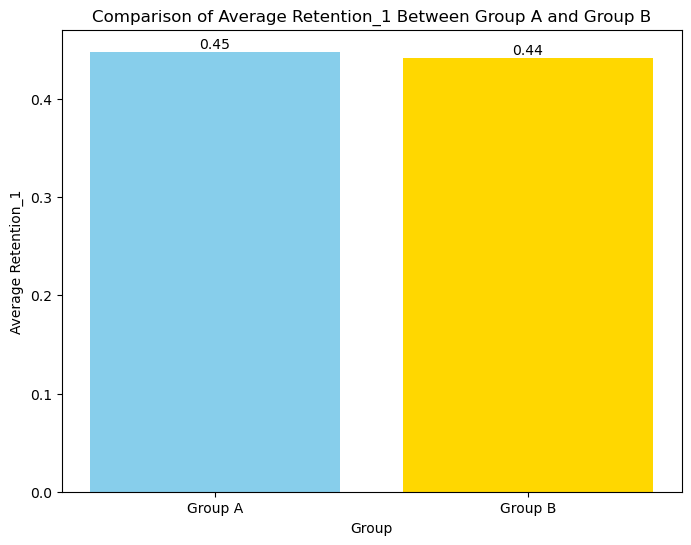

In [26]:
groups = ['Group A', 'Group B']  
averages = [df_newA_avg_1_day, df_newB_avg_1_day]  
  
plt.figure(figsize=(8, 6))  
plt.bar(groups, averages, color=['skyblue', 'gold'])  
  
plt.title('Comparison of Average Retention_1 Between Group A and Group B')  
plt.xlabel('Group')  
plt.ylabel('Average Retention_1')  
  
for index, value in enumerate(averages):  
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')  
  
plt.show()

<div class="alert alert-block alert-success">  
<b>The `1 day retention rate` in group B looks a little bit lower than that in group A. </b>   
</div>

#### Calculate `Average retention_7 rate` for both group A and group B

In [27]:
df_newA = df_new[df_new['version']=='A']
df_newA_avg_7_day = df_newA['retention_7'].sum() / df_newA['retention_7'].count()
df_newA_avg_7_day

0.19018322557551623

In [28]:
df_newB = df_new[df_new['version']=='B']
df_newB_avg_7_day = df_newB['retention_7'].sum() / df_newB['retention_7'].count()
df_newB_avg_7_day

0.18200004396667327

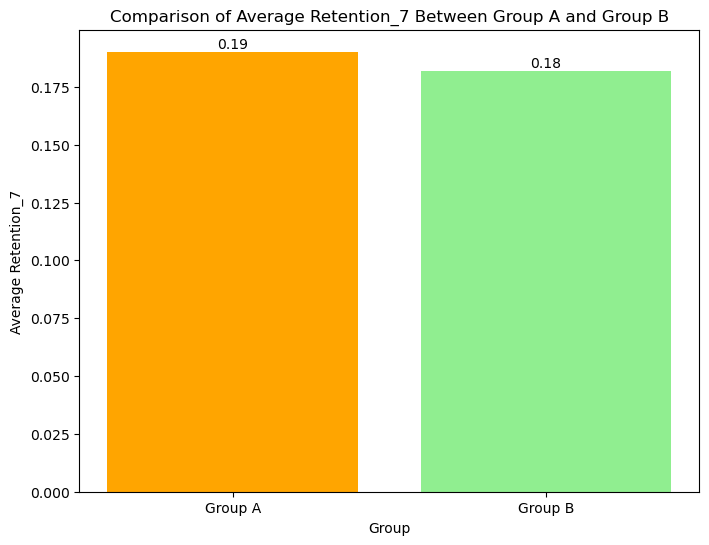

In [30]:
groups = ['Group A', 'Group B']  
averages = [df_newA_avg_7_day, df_newB_avg_7_day]  
  
plt.figure(figsize=(8, 6))  
plt.bar(groups, averages, color=['orange', 'lightgreen'])  
  
plt.title('Comparison of Average Retention_7 Between Group A and Group B')  
plt.xlabel('Group')  
plt.ylabel('Average Retention_7')  
  
for index, value in enumerate(averages):  
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')  
  
plt.show()

<div class="alert alert-block alert-success">  
<b>Similarly, the `7 day retention rate` in group B looks a little bit lower than that in group A. </b>   
</div>

#### After the EDA stage, we already have a sense about how the target metrics different between group A and group B. But we don't know if that difference is statistically significant, next we will conduct hypothesis test. But before that:

#### **Now let's do a chi-square test of independence to make sure the unequal distribution of samples is not statistically significant. Unfortunately, in this case, the chi-square test of indepence shows that there is a Sample Ratio Mismatch issue. We should stop at this point because the following test results will be biased. But I am going to keep doing the rest for illustration purpose. In reality, we might re-calculate the sample size, and do a random even distribution to fix the SRM, but here I cannot do too much about it, this is a real dataset I found on Kaggle.

In [31]:
# Observed values
observed_A = 44699
observed_B = 45489

# Expected values (pooled mean)
expected = (observed_A + observed_B) / 2
expected_A = expected
expected_B = expected

# Chi-square statistic calculation
chi_square_A = (observed_A - expected_A)**2 / expected_A
chi_square_B = (observed_B - expected_B)**2 / expected_B

# Total chi-square value
chi_square = chi_square_A + chi_square_B
print(f"Chi-square statistic: {chi_square}")

# Degrees of freedom: (r - 1) * (c - 1) = 1 * 1 = 1
df = 1

# Get the p-value from the chi-square distribution
p_value = 1 - chi2.cdf(chi_square, df)
print(f"P-value: {p_value}")

# Interpretation
if p_value > 0.05:
    print("No significant difference between the proportions of Group A and Group B (p-value > 0.05)")
else:
    print("Significant difference between the proportions of Group A and Group B (p-value <= 0.05)")

Chi-square statistic: 6.919989355568369
P-value: 0.00852374834109082
Significant difference between the proportions of Group A and Group B (p-value <= 0.05)


#### Ideally, we will need to set up the H0 and H1 hypothesis and conduct hypothesis test. If the target metric follows a standard normal distribution, then we cnosider using Z-test or T-test(Depending on whether sample size n>30).  From previous EDA, we've already seem the dsitribution of 'sum_gamerounds' is highly right-skewed,but let's still do a Anderson-Darling test to double check that.(when small sample size, use Shapiro-Wilk test). 

In [32]:
# Anderson-Darling test for group A
result = anderson(df_new[df_new['version'] == 'A']['sum_gamerounds'])
print('Anderson-Darling Statistic: %.3f' % result.statistic)

# Print the critical values and significance levels
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f'Critical value at {sl:.1f}% significance level: {cv:.3f}')


if result.statistic > result.critical_values[2]:  
    print('Reject the null hypothesis at the 5% significance level')
else:
    print('Fail to reject the null hypothesis at the 5% significance level')

Anderson-Darling Statistic: 6628.497
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092
Reject the null hypothesis at the 5% significance level


In [33]:
# Anderson-Darling test for group A
result = anderson(df_new[df_new['version'] == 'B']['sum_gamerounds'])
print('Anderson-Darling Statistic: %.3f' % result.statistic)

# Print the critical values and significance levels
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    print(f'Critical value at {sl:.1f}% significance level: {cv:.3f}')


if result.statistic > result.critical_values[2]:  
    print('Reject the null hypothesis at the 5% significance level')
else:
    print('Fail to reject the null hypothesis at the 5% significance level')

Anderson-Darling Statistic: 6742.854
Critical value at 15.0% significance level: 0.576
Critical value at 10.0% significance level: 0.656
Critical value at 5.0% significance level: 0.787
Critical value at 2.5% significance level: 0.918
Critical value at 1.0% significance level: 1.092
Reject the null hypothesis at the 5% significance level


#### Now that we got the data is NOT following a normal standard distribution, then we cannot proceed to use parametric tests like Z-test or T-test. In stead, we are considering use non-parametric test like Mann-Whitney U test. It compares the rank sum of two different sample data sets and reflect the difference.

H0 = The distributions of `sum_gamerounds` for group A and group B are identical. (This means that there is no difference between the two groups' rankings, and any observed differences are due to random chance.)   

H1 = The distributions of `sum_gamerounds` for group A and group B are statistically different. (This allows for differences in the overall distribution, not just that one group has consistently larger values. It means the two groups are not drawn from the same population distribution.)

In [34]:
plt.figure(figsize=(10, 6))

sns.histplot(df_new[df_new['version'] == 'A']['sum_gamerounds'], 
             color='red', label='Group A', kde=True, bins=50)

sns.histplot(df_new[df_new['version'] == 'B']['sum_gamerounds'], 
             color='cyan', label='Group B', kde=True, bins=50)

plt.title('Comparison of sum_gamerounds Distribution Between Group A and Group B')
plt.xlabel('sum_gamerounds')
plt.ylabel('Frequency')

plt.xlim(0,500) 
plt.ylim(0,40000)

plt.legend()
plt.show()

In [35]:
group_A = df_new[df_new['version'] =='A']['sum_gamerounds']
group_B = df_new[df_new['version'] =='B']['sum_gamerounds']

stat, p_value = mannwhitneyu(group_A, group_B)

print(f"U Statistics: {stat}")
print(f"P Value: {p_value}")


if p_value > 0.05:
    print("The distributions of sum_gamerounds for group A and group B are identical（pvalue > 0.05）")
else:
    print("The distributions of sum_gamerounds for group A and group B are statistically different（pvalue <= 0.05）")

U Statistics: 1024285761.5
P Value: 0.05089155279145376
The distributions of sum_gamerounds for group A and group B are identical（pvalue > 0.05）


<div class="alert alert-block alert-success">  
<b>Result:</b> The P-value is very close to 0.05, I could adjust the alpha to be 0.01 to get a more precise result, but based on current business problem, I don't think it's necessary. It's enough to make sure that the distributions of `sum_gamerounds` in group A and group B are pretty much idential.   
</div>

#### Now let's use retention_1 to do a proportional Z-test to find out something more informative.
H0 = The `1 day retention rate`  between group A and group B is statistically the same    

H1 = The `1 day retention rate` between group A and group B is statistically different

In [36]:
count_A = df_new[df_new['version'] == 'A']['retention_1'].sum()  
nobs_A = df_new[df_new['version'] == 'A']['retention_1'].count()  

count_B = df_new[df_new['version'] == 'B']['retention_1'].sum()  
nobs_B = df_new[df_new['version'] == 'B']['retention_1'].count()  

# Proportional Z-test
stat, p_value = proportions_ztest([count_A, count_B], [nobs_A, nobs_B])

print(f"Z-Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("No significant difference in the 1 day retention rate between group A and group B (p-value > 0.05)")
else:
    print("Significant difference in the 1 day retention rate between group A and group B (p-value <= 0.05)")

Z-Statistic: 1.787103509763628
P-value: 0.0739207603418346
No significant difference in the 1 day retention rate between group A and group B (p-value > 0.05)


<div class="alert alert-block alert-success">  
<b>Result:</b> The P-value is bigger than 0.05, so we are fail to reject the H0 hypothesis, meaning there is no significant difference for the 1 day retention rate between group A and group B.
</div>

#### Also do the same for retention_7 rate
H0 = The `7 day retention rate`  between group A and group B is statistically the same    

H1 = The `7 day retention rate` between group A and group B is statistically different

In [37]:
count_A = df_new[df_new['version'] == 'A']['retention_7'].sum()  
nobs_A = df_new[df_new['version'] == 'A']['retention_7'].count()  

count_B = df_new[df_new['version'] == 'B']['retention_7'].sum()  
nobs_B = df_new[df_new['version'] == 'B']['retention_7'].count()  

# Proportional Z-test
stat, p_value = proportions_ztest([count_A, count_B], [nobs_A, nobs_B])

print(f"Z-Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value > 0.05:
    print("No significant difference in the 7 day retention rate between group A and group B (p-value > 0.05)")
else:
    print("Significant difference in the 7 day retention rate between group A and group B (p-value <= 0.05)")

Z-Statistic: 3.1574100858819936
P-value: 0.0015917731773993442
Significant difference in the 7 day retention rate between group A and group B (p-value <= 0.05)


<div class="alert alert-block alert-success">  
<b>Result:</b> The p-value is much smaller than 0.05 in this case, so we could go ahead and summarize that the 7 day retention rates between group A and group B are statistically different.
</div>

#### And recall in the EDA part the average retention_7 in group A is bigger than that of the group B(as shown in the plot below)

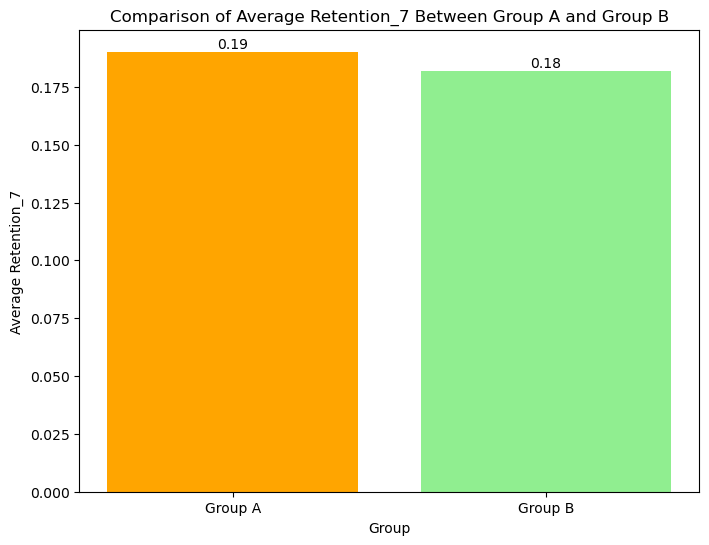

In [38]:
groups = ['Group A', 'Group B']  
averages = [df_newA_avg_7_day, df_newB_avg_7_day]  
  
plt.figure(figsize=(8, 6))  
plt.bar(groups, averages, color=['orange', 'lightgreen'])  
  
plt.title('Comparison of Average Retention_7 Between Group A and Group B')  
plt.xlabel('Group')  
plt.ylabel('Average Retention_7')  
  
for index, value in enumerate(averages):  
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')  
  
plt.show()

### Business Interpretation:
Recall that our business goal is to determine which strategy is better for the company. That is, whether putting the gate at level 30 or level 40 will keep users longer, indicating by customer's retention rate. And we tested 3 metrics:

**`sum_gamerounds`** - the number of game rounds played by the player during the first week after installation

**`retention_1`** - did the player come back and play 1 day after installing?

**`retention_7`** - did the player come back and play 7 days after installing?

Unfortunately, we cannot do a Z-test to compare the mean_sum_gamerounds difference between group A and group B because the `sum_gamerounds` does not follow a standard normal distribution and I also considered to transform the data, but `sum_gamerounds` contains a lot of 0's, so my final decision is to do a non-parametric test to make sure the distribution of `sum_grounds` between group A and group B are the same. 

Furthermore, we did a proportional Z-test to test whether the `1 day retention rate` and `7 day retention rate` between group A and group B are significant different. The result shows the 7 day retention rate is statistically lower than that in group A. So I suggest we keep the gate at level_30(group A strategy) because the new strategy to move the gate to level 40 will decrease users 7 day retention rate.

Finally,in reality, we will need to keep observing the performance of your strategy. If you decide to roll out a new strategy, consider the ramp-up strategy, and remember to keep a small fraction of your users as the holdout set as the comparison baseline.
Also, in real-world A/B testing, we will encounter all kinds of validity threats such as the violation of Stable Unit Treatment Value Assumption(SUTVA), Survirvorship bias, Sample Ratio Mismatch(like we encountered in this case), primacy effect, Holiday effect etc. We need to consider to use appropriate methods like maybe causal inference to address each issue to ensure a non-biased and effective A/B test.